In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './Part01/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


### 取得資料片段

In [4]:
print(app_train.iloc[:5, :20].dtypes)
app_train.iloc[:5, :20]

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
dtype: object


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0


In [5]:
app_train = pd.DataFrame(app_train.iloc[:, 6:11])
app_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,0,202500.0,406597.5,24700.5,351000.0
1,0,270000.0,1293502.5,35698.5,1129500.0
2,0,67500.0,135000.0,6750.0,135000.0
3,0,135000.0,312682.5,29686.5,297000.0
4,0,121500.0,513000.0,21865.5,513000.0


## Descriptive Statistics

In [6]:
app_train.mean()

CNT_CHILDREN             0.417052
AMT_INCOME_TOTAL    168797.919297
AMT_CREDIT          599025.999706
AMT_ANNUITY          27108.573909
AMT_GOODS_PRICE     538396.207429
dtype: float64

In [7]:
app_train.std()

CNT_CHILDREN             0.722121
AMT_INCOME_TOTAL    237123.146279
AMT_CREDIT          402490.776996
AMT_ANNUITY          14493.737315
AMT_GOODS_PRICE     369446.460540
dtype: float64

In [8]:
app_train.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


In [9]:
app_train.isnull().sum()

CNT_CHILDREN          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY          12
AMT_GOODS_PRICE     278
dtype: int64

## Histogram and Boxplot

In [10]:
def plot_hist(mydata, cols):
    for col in cols:
        mydata.hist(column = col, figsize = (10, 4))
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Frequency')# Set text for y axis
        plt.show()

def plot_boxplot(mydata, cols):
    for col in cols:
        mydata.boxplot(col)
        plt.title(col)
        plt.show()
        
def plot_all(mydata, col):
    subdata = pd.DataFrame(mydata[col])
    plot_hist(subdata, subdata.columns)
    plot_boxplot(subdata, subdata.columns)

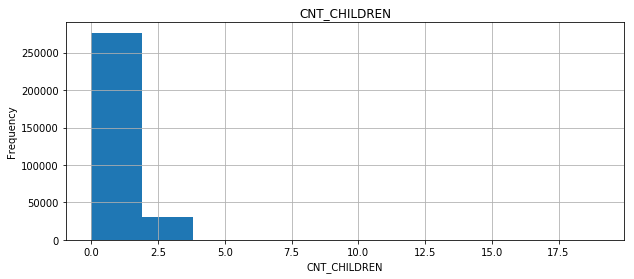

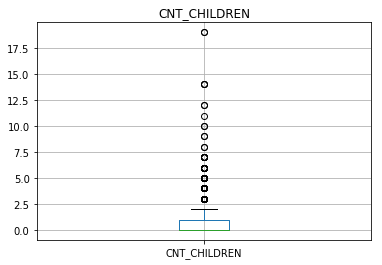

In [11]:
plot_all(app_train, 'CNT_CHILDREN')

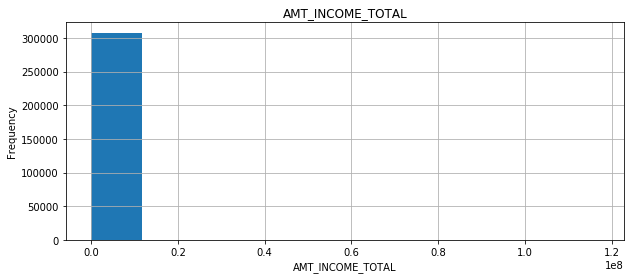

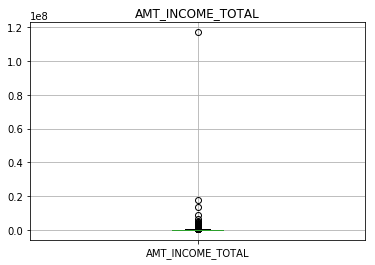

In [12]:
plot_all(app_train, 'AMT_INCOME_TOTAL')

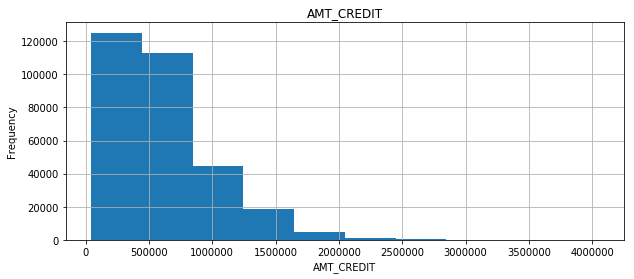

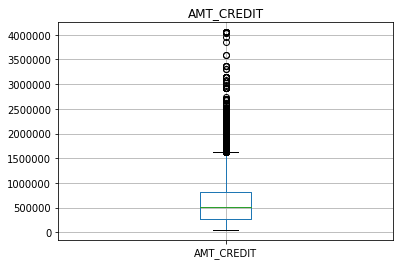

In [13]:
plot_all(app_train, 'AMT_CREDIT')

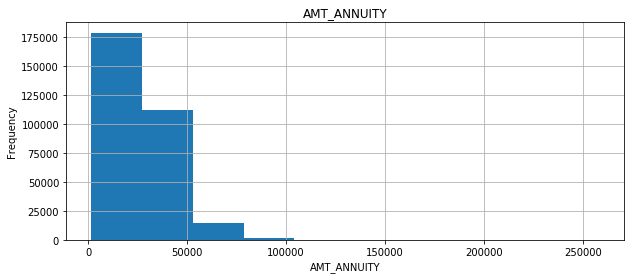

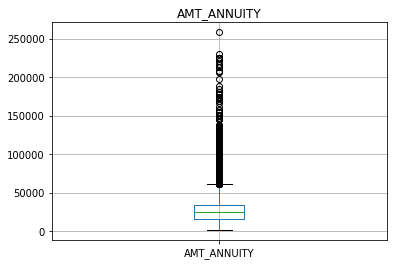

In [14]:
plot_all(app_train, 'AMT_ANNUITY')

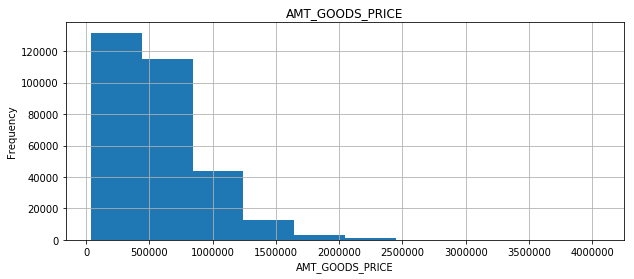

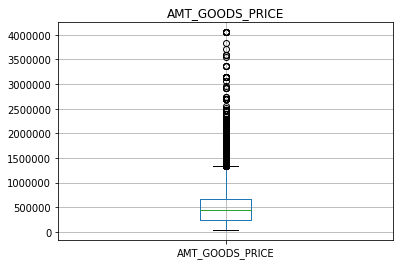

In [15]:
plot_all(app_train, 'AMT_GOODS_PRICE')